# Introduction
The purpouse of this analysis is to see the efficiency of each player in NBA during the season 2021-2022 and try to create a dream team for next season.

## Categorical types
Attributes that are represented as object, for example: words...
* **Player** is the name of the player
* **Pos** is the position where the player plays
* **Tm** is the team where the player plays

## Numerical types
Attributes that are represented by numbers
* **Rk** is just the index to identify player
* **Age** is the age of the player
* **G** quantity of games 
* **GS** games started
* **MP** minutes played per game
* **FG** field goals per game
* **FGA** field goal attempts per game
* **FG%** field goal percentage
* **3P** 3-point field goals per game
* **3PA** 3-point field goal attempts per game
* **3P%** 3-point goal percentage
* **2P** 2-point field goals per game
* **2PA** 2-point field goal attempts per game
* **2P%** 2-point goal percentage
* **eFG** effective field goal percentage
* **FT** free throws per game
* **FTA** free throws attempts per game
* **FT%** free throw percentage
* **ORB** ofensive rebounds per game
* **DRB** defensive rebounds per game
* **TRB** total rebounds per game
* **AST** assists per game
* **STL** steals per game
* **TOV** turnovers per game
* **PF** personal fouls per game
* **PTS** points per game

# Importing libraries and read csv file

In [5]:
%pip install numpy
%pip install pandas
%pip install matplotlib
%pip install seaborn

  Cache entry deserialization failed, entry ignored
You are using pip version 9.0.1, however version 22.0.3 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


Note: you may need to restart the kernel to use updated packages.


  Cache entry deserialization failed, entry ignored
  Cache entry deserialization failed, entry ignored
  Cache entry deserialization failed, entry ignored
You are using pip version 9.0.1, however version 22.0.3 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


  Cache entry deserialization failed, entry ignored
  Cache entry deserialization failed, entry ignored
  Cache entry deserialization failed, entry ignored
  Cache entry deserialization failed, entry ignored
  Cache entry deserialization failed, entry ignored
  Cache entry deserialization failed, entry ignored
  Cache entry deserialization failed, entry ignored
You are using pip version 9.0.1, however version 22.0.3 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


Note: you may need to restart the kernel to use updated packages.


  Cache entry deserialization failed, entry ignored
  Cache entry deserialization failed, entry ignored
  Cache entry deserialization failed, entry ignored
You are using pip version 9.0.1, however version 22.0.3 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [50]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('whitegrid')

In [7]:
players = pd.read_csv('Player_stats.csv', delimiter=';', encoding='latin-1', index_col=0)
players.head()

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
Rk,,,,,,,,,,,,,,,,,,,,,
1,Precious Achiuwa,C,22,TOR,34,20,25.3,3.4,8.1,0.412,...,0.574,2.4,5.3,7.7,1.3,0.6,0.6,1.1,2.2,7.9
2,Steven Adams,C,28,MEM,44,43,25.7,2.6,4.9,0.521,...,0.566,4.3,4.9,9.3,3.0,1.0,0.6,1.6,1.7,6.7
3,Bam Adebayo,C,24,MIA,21,21,32.9,6.9,13.3,0.518,...,0.767,2.6,7.3,10.0,3.2,1.2,0.5,2.9,3.1,18.7
4,Santi Aldama,PF,21,MEM,25,0,10.5,1.4,3.8,0.372,...,0.579,0.9,1.6,2.5,0.5,0.1,0.2,0.3,0.9,3.4
5,LaMarcus Aldridge,C,36,BRK,32,10,23.1,5.9,10.3,0.574,...,0.862,1.5,4.1,5.7,0.9,0.4,1.1,0.8,1.7,13.8


In [8]:
players.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 590 entries, 1 to 590
Data columns (total 29 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Player  590 non-null    object 
 1   Pos     590 non-null    object 
 2   Age     590 non-null    int64  
 3   Tm      590 non-null    object 
 4   G       590 non-null    int64  
 5   GS      590 non-null    int64  
 6   MP      590 non-null    float64
 7   FG      590 non-null    float64
 8   FGA     590 non-null    float64
 9   FG%     590 non-null    float64
 10  3P      590 non-null    float64
 11  3PA     590 non-null    float64
 12  3P%     590 non-null    float64
 13  2P      590 non-null    float64
 14  2PA     590 non-null    float64
 15  2P%     590 non-null    float64
 16  eFG%    590 non-null    float64
 17  FT      590 non-null    float64
 18  FTA     590 non-null    float64
 19  FT%     590 non-null    float64
 20  ORB     590 non-null    float64
 21  DRB     590 non-null    float64
 22  TR

# Data Cleaning

In [9]:
players.columns

Index(['Player', 'Pos', 'Age', 'Tm', 'G', 'GS', 'MP', 'FG', 'FGA', 'FG%', '3P',
       '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%', 'ORB',
       'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS'],
      dtype='object')

In [10]:
players.isin(['?']).sum(axis=0)

Player    0
Pos       0
Age       0
Tm        0
G         0
GS        0
MP        0
FG        0
FGA       0
FG%       0
3P        0
3PA       0
3P%       0
2P        0
2PA       0
2P%       0
eFG%      0
FT        0
FTA       0
FT%       0
ORB       0
DRB       0
TRB       0
AST       0
STL       0
BLK       0
TOV       0
PF        0
PTS       0
dtype: int64

In [11]:
null_values = players.isnull().sum()
null_values[:]

Player    0
Pos       0
Age       0
Tm        0
G         0
GS        0
MP        0
FG        0
FGA       0
FG%       0
3P        0
3PA       0
3P%       0
2P        0
2PA       0
2P%       0
eFG%      0
FT        0
FTA       0
FT%       0
ORB       0
DRB       0
TRB       0
AST       0
STL       0
BLK       0
TOV       0
PF        0
PTS       0
dtype: int64

So there's no null values in our dataset.

# Inserting new column
Now, let's create new column called as "Efficiency" and we are going to perform some measurements for it.
The method of calculation for this columns is made by:

Efficiency = (PTS + AST + STL + REB + BLK - Missed FG - Missed FT - TOV)

In [12]:
Efficiency = players['PTS'] + players['TRB'] + players['AST'] + players['STL'] + players['BLK'] - (players['FGA'] - players['FG']) - (players['FTA'] - players['FT']) - players['TOV'] - players['PF']
players.insert(loc=29, column='EFF', value=Efficiency)
players.sample(10)

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,EFF
Rk,,,,,,,,,,,,,,,,,,,,,
40,Bradley Beal,SG,28,WAS,37,37,36.0,8.9,19.7,0.455,...,1.0,3.7,4.7,6.5,0.9,0.4,3.4,2.4,23.7,1.880000e+01
3,Bam Adebayo,C,24,MIA,21,21,32.9,6.9,13.3,0.518,...,2.6,7.3,10.0,3.2,1.2,0.5,2.9,3.1,18.7,1.980000e+01
420,Cedi Osman,SF,26,CLE,34,0,22.7,3.8,8.8,0.431,...,0.4,2.1,2.5,1.7,1.0,0.2,0.9,1.8,10.7,7.800000e+00
232,George Hill,SG,35,MIL,38,15,25.7,2.5,5.8,0.436,...,0.8,2.4,3.2,2.5,0.7,0.1,0.9,1.4,7.0,7.900000e+00
570,Brandon Williams,PG,22,POR,2,0,6.0,1.0,1.5,0.667,...,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,4.0,4.000000e+00
165,Malachi Flynn,PG,23,TOR,27,1,8.6,1.1,3.2,0.349,...,0.2,0.8,1.0,0.9,0.4,0.1,0.3,0.9,2.8,1.700000e+00
234,Solomon Hill,PF,30,ATL,13,1,10.7,0.2,1.5,0.150,...,0.5,1.3,1.8,0.9,0.3,0.2,0.1,1.2,0.6,1.200000e+00
62,Avery Bradley,SG,31,LAL,38,33,23.7,2.6,6.1,0.424,...,0.6,1.9,2.5,0.9,0.9,0.2,0.5,1.8,6.8,5.500000e+00
519,Jon Teske,C,24,MEM,3,0,2.7,0.0,0.3,0.000,...,0.0,0.7,0.7,0.3,0.3,0.0,0.0,0.3,0.0,5.551115e-17


# Grouping data into position categories (C, PG, SG, PF and SF)

* **C**: Center - plays close to the basket and scores most of their points off offensive rebounds or by "posting up" in the paint.
* **PG**: Point Guard - is in charge of running the offense, setting up plays, and controlling the tempo of the game.
* **SG**: Shooting Guard - best shooter on a team, an excellent free throw shooter and can drive to the basket in addition to taking long distance shots.
* **PF**: Power Forward - requires speed, athleticism, and a good mid-range jump shot. Prioritize rebounds and defense and have to be a good passer.
* **SF**: Small Forward - is usually the most well-round versatile player on a team. Must be an excellent ball-handler, three-point shooter, passer and have the strenght to drive to the basket and score from down low.

In [13]:
players_C = players.groupby('Pos').get_group('C')
players_C.head()

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,EFF
Rk,,,,,,,,,,,,,,,,,,,,,
1,Precious Achiuwa,C,22,TOR,34,20,25.3,3.4,8.1,0.412,...,2.4,5.3,7.7,1.3,0.6,0.6,1.1,2.2,7.9,9.4
2,Steven Adams,C,28,MEM,44,43,25.7,2.6,4.9,0.521,...,4.3,4.9,9.3,3.0,1.0,0.6,1.6,1.7,6.7,13.8
3,Bam Adebayo,C,24,MIA,21,21,32.9,6.9,13.3,0.518,...,2.6,7.3,10.0,3.2,1.2,0.5,2.9,3.1,18.7,19.8
5,LaMarcus Aldridge,C,36,BRK,32,10,23.1,5.9,10.3,0.574,...,1.5,4.1,5.7,0.9,0.4,1.1,0.8,1.7,13.8,14.8
8,Jarrett Allen,C,23,CLE,39,39,32.7,6.7,9.6,0.695,...,3.3,7.6,10.9,1.8,0.8,1.4,1.9,1.8,16.3,23.3


In [14]:
players_PG = players.groupby('Pos').get_group('PG')
players_PG.head()

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,EFF
Rk,,,,,,,,,,,,,,,,,,,,,
9,Jose Alvarado,PG,23,NOP,18,0,9.2,1.1,3.1,0.364,...,0.3,0.7,1.0,1.6,1.0,0.1,0.2,1.0,3.1,3.3
15,Cole Anthony,PG,21,ORL,33,33,33.2,6.2,15.8,0.396,...,0.6,5.5,6.1,5.8,0.8,0.3,2.8,2.7,18.2,15.5
18,D.J. Augustin,PG,34,HOU,33,2,15.0,1.7,4.0,0.414,...,0.2,1.0,1.2,2.2,0.3,0.0,1.3,0.5,5.5,4.9
24,LaMelo Ball,PG,20,CHO,39,39,31.8,6.9,16.5,0.418,...,1.7,5.6,7.3,7.7,1.6,0.4,3.1,3.0,19.0,20.0
25,Lonzo Ball,PG,24,CHI,35,35,34.6,4.6,10.9,0.423,...,1.0,4.4,5.4,5.1,1.8,0.9,2.3,2.4,13.0,15.0


In [15]:
players_SG = players.groupby('Pos').get_group('SG')
players_SG.head()

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,EFF
Rk,,,,,,,,,,,,,,,,,,,,,
6,Nickeil Alexander-Walker,SG,23,NOP,42,18,26.5,4.7,12.8,0.370,...,0.8,2.6,3.4,2.6,0.8,0.3,1.6,1.8,12.6,7.7
7,Grayson Allen,SG,26,MIL,41,40,28.1,4.1,9.6,0.423,...,0.5,2.9,3.4,1.3,0.8,0.4,0.6,1.5,11.8,9.9
20,Joel Ayayi,SG,21,WAS,7,0,2.9,0.1,0.9,0.167,...,0.1,0.3,0.4,0.6,0.0,0.0,0.0,0.0,0.3,0.5
33,Will Barton,SG,31,DEN,39,39,32.8,5.8,13.4,0.431,...,0.6,4.2,4.8,4.2,0.8,0.5,1.8,1.4,15.3,14.4
40,Bradley Beal,SG,28,WAS,37,37,36.0,8.9,19.7,0.455,...,1.0,3.7,4.7,6.5,0.9,0.4,3.4,2.4,23.7,18.8


In [30]:
players_PF = players.groupby('Pos').get_group('PF')
players_PF.head()

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,EFF
Rk,,,,,,,,,,,,,,,,,,,,,
4,Santi Aldama,PF,21,MEM,25,0,10.5,1.4,3.8,0.372,...,0.9,1.6,2.5,0.5,0.1,0.2,0.3,0.9,3.4,2.7
11,Kyle Anderson,PF,28,MEM,38,8,22.4,3.2,7.4,0.436,...,0.9,4.4,5.3,2.6,1.1,0.6,1.1,1.5,8.2,10.4
12,Giannis Antetokounmpo,PF,27,MIL,39,39,32.7,9.9,18.7,0.531,...,1.8,9.5,11.3,6.0,1.0,1.5,3.5,3.3,28.6,29.7
14,Carmelo Anthony,PF,37,LAL,43,3,26.9,4.6,10.6,0.434,...,0.9,3.3,4.2,1.0,0.7,0.8,0.8,2.3,13.4,10.6
23,Marvin Bagley III,PF,22,SAC,26,13,21.9,3.8,8.2,0.460,...,2.3,5.0,7.3,0.6,0.3,0.3,0.7,1.7,9.4,10.6


In [17]:
players_SF = players.groupby('Pos').get_group('SF')
players_SF.head()

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,EFF
Rk,,,,,,,,,,,,,,,,,,,,,
10,Justin Anderson,SF,28,IND,3,0,10.0,0.7,3.7,0.182,...,0.7,0.7,1.3,1.0,0.3,0.3,0.3,1.7,2.7,0.6
13,Thanasis Antetokounmpo,SF,29,MIL,28,5,11.9,1.4,2.9,0.463,...,1.1,1.7,2.8,0.7,0.5,0.3,0.6,1.9,3.3,3.2
16,OG Anunoby,SF,24,TOR,28,28,36.5,7.0,16.0,0.434,...,1.5,3.8,5.3,2.3,1.6,0.4,1.8,2.9,18.9,14.1
17,Trevor Ariza,SF,36,LAL,12,5,19.2,1.3,3.3,0.375,...,0.3,2.9,3.3,1.3,0.5,0.2,0.3,0.6,3.7,6.0
19,Deni Avdija,SF,21,WAS,46,6,22.5,2.6,6.0,0.437,...,0.7,4.0,4.7,1.6,0.8,0.7,0.9,2.2,7.2,8.1


#  Gráfico de Pos x EFF

<AxesSubplot:xlabel='Pos', ylabel='EFF'>

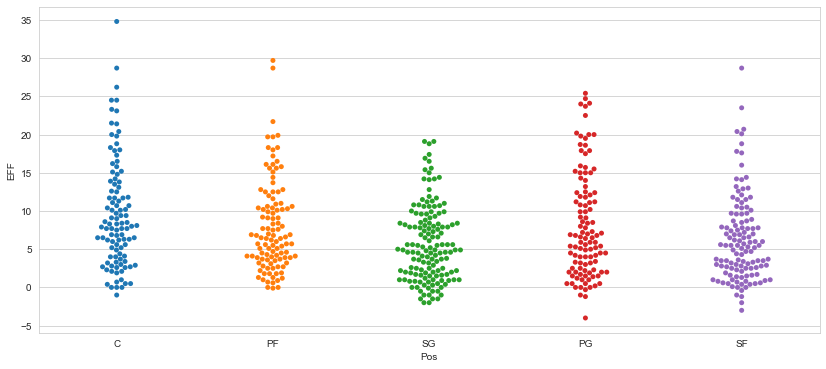

In [19]:
plt.figure(figsize=(14, 6))
sns.swarmplot(x='Pos', y='EFF', data=players)

In [47]:
players_SG.sort_values(by='EFF', ascending=False).head(10)

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,EFF
Rk,,,,,,,,,,,,,,,,,,,,,
374,Donovan Mitchell,SG,25,UTA,40,40,33.5,9.3,20.7,0.450,...,0.8,3.1,4.0,5.2,1.6,0.2,3.0,2.5,25.5,19.1
58,Devin Booker,SG,25,PHO,37,37,33.0,8.8,19.7,0.447,...,0.8,4.5,5.3,4.5,0.9,0.3,2.5,2.5,24.6,19.1
40,Bradley Beal,SG,28,WAS,37,37,36.0,8.9,19.7,0.455,...,1.0,3.7,4.7,6.5,0.9,0.4,3.4,2.4,23.7,18.8
207,Tyrese Haliburton,SG,21,SAC,43,43,34.0,5.2,11.0,0.467,...,0.7,3.1,3.9,7.1,1.7,0.7,2.2,1.4,13.7,17.4
152,Anthony Edwards,SG,20,MIN,39,39,35.1,8.1,18.3,0.442,...,1.1,4.1,5.2,3.6,1.5,0.7,3.1,2.3,22.2,16.9
474,Terry Rozier,SG,27,CHO,37,37,32.7,6.9,15.7,0.439,...,0.7,3.4,4.1,3.9,1.1,0.4,1.1,1.4,18.8,16.5
229,Tyler Herro,SG,22,MIA,38,10,32.9,7.6,17.8,0.430,...,0.7,4.2,4.9,4.0,0.6,0.2,2.8,1.4,20.7,15.6
353,CJ McCollum,SG,30,POR,27,27,35.0,8.0,18.6,0.427,...,1.0,3.0,4.0,4.3,1.1,0.7,2.1,2.1,20.7,15.4
184,Josh Giddey,SG,19,OKC,40,40,30.7,4.9,11.9,0.409,...,1.7,5.8,7.5,6.3,1.0,0.5,2.9,1.6,11.6,15.0


In [31]:
mvp_C = players_C.sort_values(by='EFF', ascending=False).iloc[0]
mvp_PG = players_PG.sort_values(by='EFF', ascending=False).iloc[0]
mvp_SG = players_SG.sort_values(by='EFF', ascending=False).iloc[0]
mvp_PF = players_PF.sort_values(by='EFF', ascending=False).iloc[0]
mvp_SF = players_SF.sort_values(by='EFF', ascending=False).iloc[0]

In [43]:
type(mvp_C)

pandas.core.series.Series

In [45]:
dreamteam = [mvp_C, mvp_PG, mvp_SG, mvp_PF, mvp_SF]

dreamteam_df = pd.DataFrame(dreamteam)
type(dreamteam_df)

dreamteam_df

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,EFF
282,Nikola Joki?,C,26,DEN,39,39,33.1,10.1,17.7,0.572,...,2.8,11.1,13.9,7.5,1.4,0.8,3.5,2.5,25.9,34.8
211,James Harden,PG,32,BRK,40,40,37.0,6.7,16.0,0.421,...,1.0,7.1,8.1,10.0,1.3,0.7,4.8,2.5,23.0,25.4
374,Donovan Mitchell,SG,25,UTA,40,40,33.5,9.3,20.7,0.450,...,0.8,3.1,4.0,5.2,1.6,0.2,3.0,2.5,25.5,19.1
12,Giannis Antetokounmpo,PF,27,MIL,39,39,32.7,9.9,18.7,0.531,...,1.8,9.5,11.3,6.0,1.0,1.5,3.5,3.3,28.6,29.7
266,LeBron James,SF,37,LAL,34,34,36.6,10.8,20.9,0.517,...,1.1,6.5,7.6,6.4,1.6,1.1,3.2,2.2,28.9,28.7


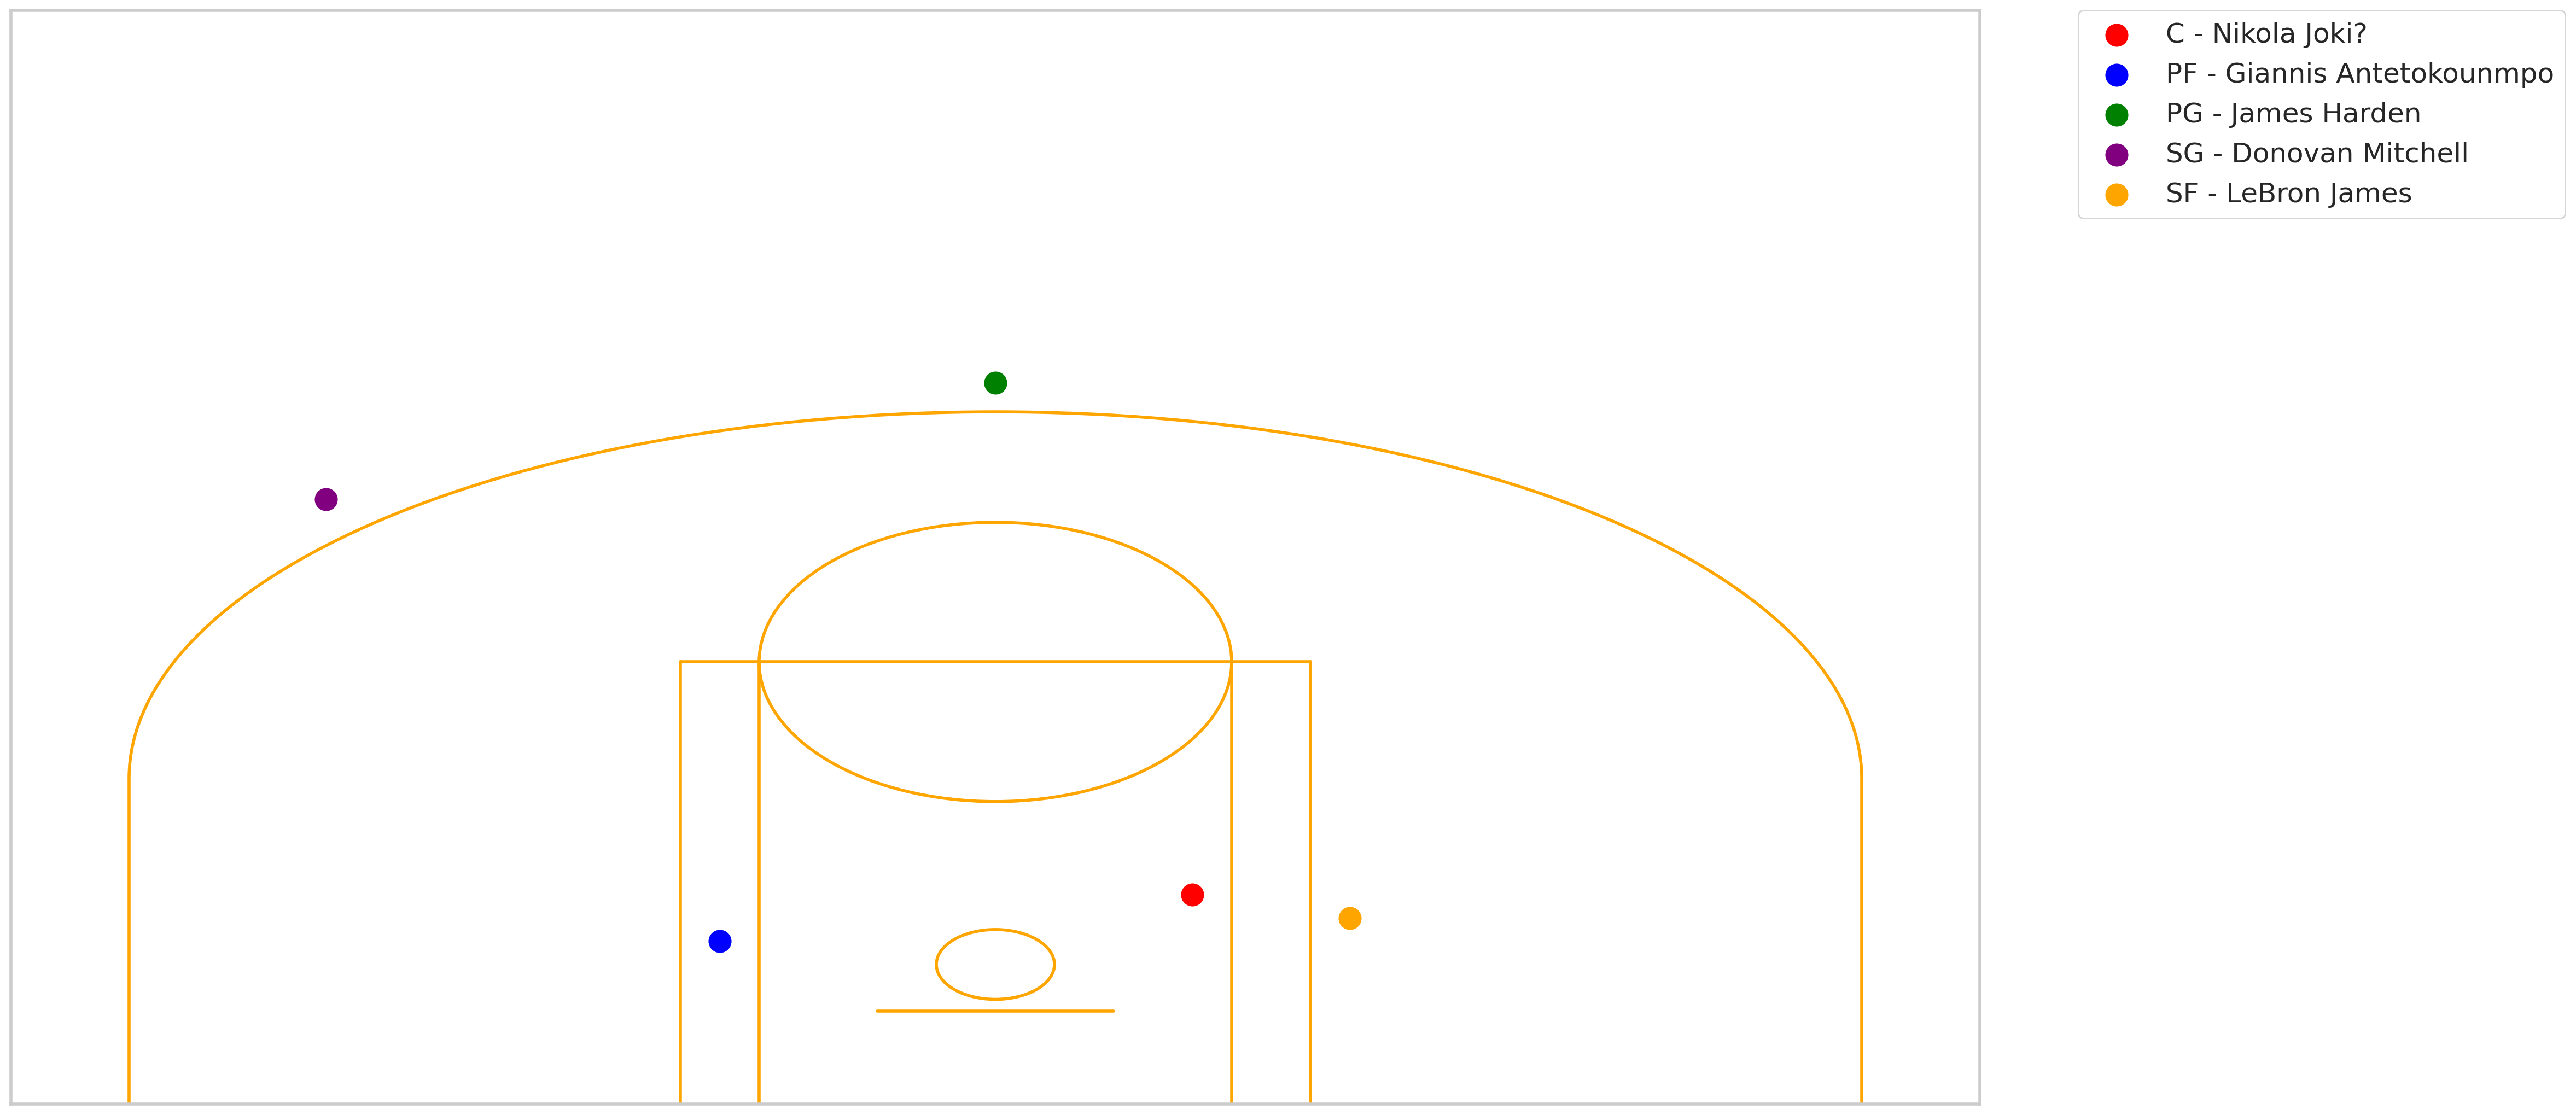

In [143]:
def create_court(ax, color):
    # Short corner 3 PT lines
    ax.plot([-220, -220], [0, 140], color=color, linewidth=2)
    ax.plot([220, 220], [0, 140], color=color, linewidth=2)
    # 3PT Arc
    ax.add_artist(mpl.patches.Arc((0, 140), 440, 315, theta1=0, theta2=180, facecolor='none', edgecolor=color, lw=2))
    # Lane and Key
    ax.plot([-80, -80], [0, 190], linewidth=2, color=color)
    ax.plot([80, 80], [0, 190], linewidth=2, color=color)
    ax.plot([-60, -60], [0, 190], linewidth=2, color=color)
    ax.plot([60, 60], [0, 190], linewidth=2, color=color)
    ax.plot([-80, 80], [190, 190], linewidth=2, color=color)
    ax.add_artist(mpl.patches.Circle((0, 190), 60, facecolor='none', edgecolor=color, lw=2))
    # Rim
    ax.add_artist(mpl.patches.Circle((0, 60), 15, facecolor='none', edgecolor=color, lw=2))
    # Backboard
    ax.plot([-30, 30], [40, 40], linewidth=2, color=color)
    # Remove ticks
    ax.set_xticks([])
    ax.set_yticks([])
    # Set axis limits
    ax.set_xlim(-250, 250)
    ax.set_ylim(0, 470)

# General plot parameters
mpl.rcParams['font.family'] = 'Avenir'
mpl.rcParams['font.size'] = 18
mpl.rcParams['axes.linewidth'] = 2
# Draw basketball court
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5, 4.76))
#fig = plt.figure(figsize=(7, 5.76))

ax = fig.add_axes([0, 0, 1, 1])
ax = create_court(ax, 'orange')

#ax.set_facecolor('blue')
#ax.set_facecolor((1.0, 0.47, 0.42))

# Put legend in upper right corner with position of each player

#plt.legend(loc='upper right', numpoints=1, label=)
plt.scatter(50, 90, s=200, c='red', marker='o', label=dreamteam_df.iloc[0]['Pos'] + ' ' + '-' + ' ' + dreamteam_df.iloc[0]['Player'])
plt.scatter(-70, 70, s=200, c='blue', marker='o', label=dreamteam_df.iloc[3]['Pos'] + ' ' + '-' + ' ' + dreamteam_df.iloc[3]['Player'])
plt.scatter(0, 310 , s=200, c='green', marker='o', label=dreamteam_df.iloc[1]['Pos'] + ' ' + '-' + ' ' + dreamteam_df.iloc[1]['Player'])
plt.scatter(-170, 260, s=200, c='purple', marker='o', label=dreamteam_df.iloc[2]['Pos'] + ' ' + '-' + ' ' + dreamteam_df.iloc[2]['Player'])
plt.scatter(90, 80, s=200, c='orange', marker='o', label=dreamteam_df.iloc[4]['Pos'] + ' ' + '-' + ' ' + dreamteam_df.iloc[4]['Player'])
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
fig.set_size_inches(18, 10, forward=True)
fig.set_dpi(200)

plt.show()